In [186]:
!pip install highlight_text

In [187]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from mplsoccer import Bumpy, FontManager, add_image
from highlight_text import fig_text

In [135]:
epl = pd.read_csv("https://www.football-data.co.uk/mmz4281/2021/E0.csv")
ep = epl[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl = epl.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
epl.head()

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97


In [136]:
epl['Date']= pd.to_datetime(epl['Date'], format='%d/%m/%Y')

In [137]:
epl.columns[:53]

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'HomeGoals', 'AwayGoals',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A',
       'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH',
       'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH',
       'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5'],
      dtype='object')

In [52]:
epl[(epl['HomeTeam']=='Chelsea') | (epl['AwayTeam']=='Chelsea')]

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
6,E0,2020-09-14,20:15,Brighton,Chelsea,1,3,A,0,1,...,2.17,1.00,1.93,1.97,1.94,1.98,2.02,2.02,1.93,1.95
14,E0,2020-09-20,16:30,Chelsea,Liverpool,0,2,A,0,0,...,2.34,0.25,2.07,1.86,2.04,1.89,2.19,1.89,2.08,1.81
20,E0,2020-09-26,17:30,West Brom,Chelsea,3,3,D,3,0,...,2.46,1.25,1.89,2.01,1.90,2.03,2.01,2.11,1.88,2.01
28,E0,2020-10-03,12:30,Chelsea,Crystal Palace,4,0,H,0,0,...,2.08,-1.00,1.93,2.00,1.95,1.97,1.95,2.08,1.90,1.98
39,E0,2020-10-17,15:00,Chelsea,Southampton,3,3,D,2,1,...,2.51,-1.00,2.00,1.90,2.06,1.88,2.08,1.98,1.97,1.91
51,E0,2020-10-24,17:30,Man United,Chelsea,0,0,D,0,0,...,2.17,0.00,1.93,2.00,1.93,2.00,1.98,2.05,1.90,1.98
60,E0,2020-10-31,15:00,Burnley,Chelsea,0,3,A,0,1,...,2.02,1.00,1.83,2.07,1.84,2.10,1.94,2.12,1.84,2.04
72,E0,2020-11-07,17:30,Chelsea,Sheffield United,4,1,H,2,1,...,2.09,-1.25,1.86,2.07,1.89,2.04,1.91,2.11,1.86,2.03
78,E0,2020-11-21,12:30,Newcastle,Chelsea,0,2,A,0,1,...,2.20,1.25,1.92,2.01,1.90,2.03,1.94,2.05,1.88,2.00
94,E0,2020-11-29,16:30,Chelsea,Tottenham,0,0,D,0,0,...,2.14,-0.50,2.02,1.88,2.00,1.93,2.05,1.93,2.02,1.86


In [53]:
epl['HomeTeam'] = np.where((epl['Date'] <= '2021-01-19') & (epl['HomeTeam'] == 'Chelsea'), 'Chelsea_Lampard', epl['HomeTeam'])
epl['AwayTeam'] = np.where((epl['Date'] <= '2021-01-19') & (epl['AwayTeam'] == 'Chelsea'), 'Chelsea_Lampard', epl['AwayTeam'])
epl['HomeTeam'] = np.where((epl['Date'] > '2021-01-19') & (epl['HomeTeam'] == 'Chelsea'), 'Chelsea_Tuchel', epl['HomeTeam'])
epl['AwayTeam'] = np.where((epl['Date'] > '2021-01-19') & (epl['AwayTeam'] == 'Chelsea'), 'Chelsea_Tuchel', epl['AwayTeam'])

In [54]:
epl[(epl['HomeTeam']=='Chelsea_Lampard') | (epl['AwayTeam']=='Chelsea_Lampard')]

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
6,E0,2020-09-14,20:15,Brighton,Chelsea_Lampard,1,3,A,0,1,...,2.17,1.00,1.93,1.97,1.94,1.98,2.02,2.02,1.93,1.95
14,E0,2020-09-20,16:30,Chelsea_Lampard,Liverpool,0,2,A,0,0,...,2.34,0.25,2.07,1.86,2.04,1.89,2.19,1.89,2.08,1.81
20,E0,2020-09-26,17:30,West Brom,Chelsea_Lampard,3,3,D,3,0,...,2.46,1.25,1.89,2.01,1.90,2.03,2.01,2.11,1.88,2.01
28,E0,2020-10-03,12:30,Chelsea_Lampard,Crystal Palace,4,0,H,0,0,...,2.08,-1.00,1.93,2.00,1.95,1.97,1.95,2.08,1.90,1.98
39,E0,2020-10-17,15:00,Chelsea_Lampard,Southampton,3,3,D,2,1,...,2.51,-1.00,2.00,1.90,2.06,1.88,2.08,1.98,1.97,1.91
51,E0,2020-10-24,17:30,Man United,Chelsea_Lampard,0,0,D,0,0,...,2.17,0.00,1.93,2.00,1.93,2.00,1.98,2.05,1.90,1.98
60,E0,2020-10-31,15:00,Burnley,Chelsea_Lampard,0,3,A,0,1,...,2.02,1.00,1.83,2.07,1.84,2.10,1.94,2.12,1.84,2.04
72,E0,2020-11-07,17:30,Chelsea_Lampard,Sheffield United,4,1,H,2,1,...,2.09,-1.25,1.86,2.07,1.89,2.04,1.91,2.11,1.86,2.03
78,E0,2020-11-21,12:30,Newcastle,Chelsea_Lampard,0,2,A,0,1,...,2.20,1.25,1.92,2.01,1.90,2.03,1.94,2.05,1.88,2.00
94,E0,2020-11-29,16:30,Chelsea_Lampard,Tottenham,0,0,D,0,0,...,2.14,-0.50,2.02,1.88,2.00,1.93,2.05,1.93,2.02,1.86


In [55]:
epl[(epl['HomeTeam']=='Chelsea_Tuchel') | (epl['AwayTeam']=='Chelsea_Tuchel')]

,Div,Date,Time,HomeTeam,AwayTeam,HomeGoals,AwayGoals,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
190,E0,2021-01-27,18:00,Chelsea_Tuchel,Wolves,0,0,D,0,0,...,1.82,-0.75,1.84,2.09,1.84,2.10,1.86,2.12,1.82,2.06
201,E0,2021-01-31,12:00,Chelsea_Tuchel,Burnley,2,0,H,1,0,...,2.08,-1.50,2.08,1.73,2.14,1.79,2.18,1.96,2.03,1.84
214,E0,2021-02-04,20:00,Tottenham,Chelsea_Tuchel,0,1,A,0,1,...,1.80,0.50,1.92,2.01,1.93,1.99,1.95,2.07,1.89,1.99
223,E0,2021-02-07,19:15,Sheffield United,Chelsea_Tuchel,1,2,A,0,1,...,1.87,1.00,2.01,1.92,1.99,1.93,2.10,1.96,2.02,1.86
234,E0,2021-02-15,20:00,Chelsea_Tuchel,Newcastle,2,0,H,2,0,...,2.19,-1.50,1.91,2.02,1.88,2.05,1.99,2.10,1.91,1.97
238,E0,2021-02-20,12:30,Southampton,Chelsea_Tuchel,1,1,D,1,0,...,1.98,0.75,1.77,2.02,1.83,2.09,1.93,2.13,1.85,2.04
255,E0,2021-02-28,16:30,Chelsea_Tuchel,Man United,0,0,D,0,0,...,1.92,-0.25,2.05,1.85,2.07,1.87,2.08,1.91,2.02,1.86
264,E0,2021-03-04,20:15,Liverpool,Chelsea_Tuchel,0,1,A,0,1,...,1.93,-0.25,1.95,1.98,1.95,1.97,1.97,2.03,1.91,1.98
273,E0,2021-03-08,18:00,Chelsea_Tuchel,Everton,2,0,H,1,0,...,1.77,-0.75,1.88,2.05,1.88,2.04,1.88,2.14,1.82,2.08
277,E0,2021-03-13,12:30,Leeds,Chelsea_Tuchel,0,0,D,0,0,...,2.05,0.75,2.02,1.91,2.02,1.90,2.11,1.94,2.00,1.90


In [138]:
#Chelsea under Lampard vs Tuchel
teams = ['Man City', 'Liverpool', 'Man United', 'Tottenham', 'Arsenal', 'Chelsea']

#dictionary to store data
team_dfs = dict()
for team in teams:
    #empty dataframe
    team_df = pd.DataFrame(columns = ["Points"])
    #get matches by this team
    matches = epl.loc[(epl['AwayTeam'] == team) | (epl['HomeTeam'] == team)]
    #auxilliary variable that will be helpful to plot
    if (team == 'Chelsea_Tuchel'):
        game = 19
    else:
        game = 0
    for i, match in matches.iterrows():
        game += 1
   
        #if team was away
        if match['AwayTeam'] == team:
            #get goals for both teams
            goalsfor = match['AwayGoals']
            goalsagainst = match['HomeGoals']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'A':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
        else:
            #geat goals for both teams
            goalsfor = match['HomeGoals']
            goalsagainst = match['AwayGoals']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'H':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
                #assign value to dataframe
        team_df.at[i, "Points"] = points
        # team_df.at[i, "Game"] = game
    #calculate rolling average
    team_df['PointsRA'] = team_df['Points'].rolling(window=5, win_type='triang').mean()
    #append df
    team_dfs[team] = team_df

In [139]:
team_dfs.keys()

dict_keys(['Man City', 'Liverpool', 'Man United', 'Tottenham', 'Arsenal', 'Chelsea'])

In [140]:
season_dict = dict()
for club in team_dfs.keys():
    season_dict[club ] = team_dfs[club]['PointsRA']

In [141]:
season_dict

{'Man City': 17          NaN
 24          NaN
 30          NaN
 40          NaN
 49     1.444444
 59     1.777778
 76     1.888889
 80     1.777778
 90     1.444444
 99     1.555556
 110    1.888889
 118    2.000000
 128    1.888889
 141    1.888889
 162    2.333333
 167    2.777778
 177    3.000000
 181    3.000000
 188    3.000000
 197    3.000000
 209    3.000000
 222    3.000000
 227    3.000000
 236    3.000000
 244    3.000000
 248    3.000000
 258    3.000000
 271    2.666667
 275    2.333333
 280    2.000000
 292    2.333333
 301    2.333333
 318    2.333333
 329    2.000000
 340    2.000000
 352    2.000000
 362    1.666667
 376    1.666667
 Name: PointsRA, dtype: float64,
 'Liverpool': 2           NaN
 14          NaN
 27          NaN
 37          NaN
 38     2.111111
 52     1.555556
 61     1.666667
 76     2.000000
 85     2.333333
 89     2.111111
 105    2.111111
 114    1.888889
 123    2.111111
 127    2.111111
 145    2.333333
 154    2.111111
 163    1.555556
 176   

In [207]:
font_normal = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                          "roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        "robotoslab/RobotoSlab%5Bwght%5D.ttf")

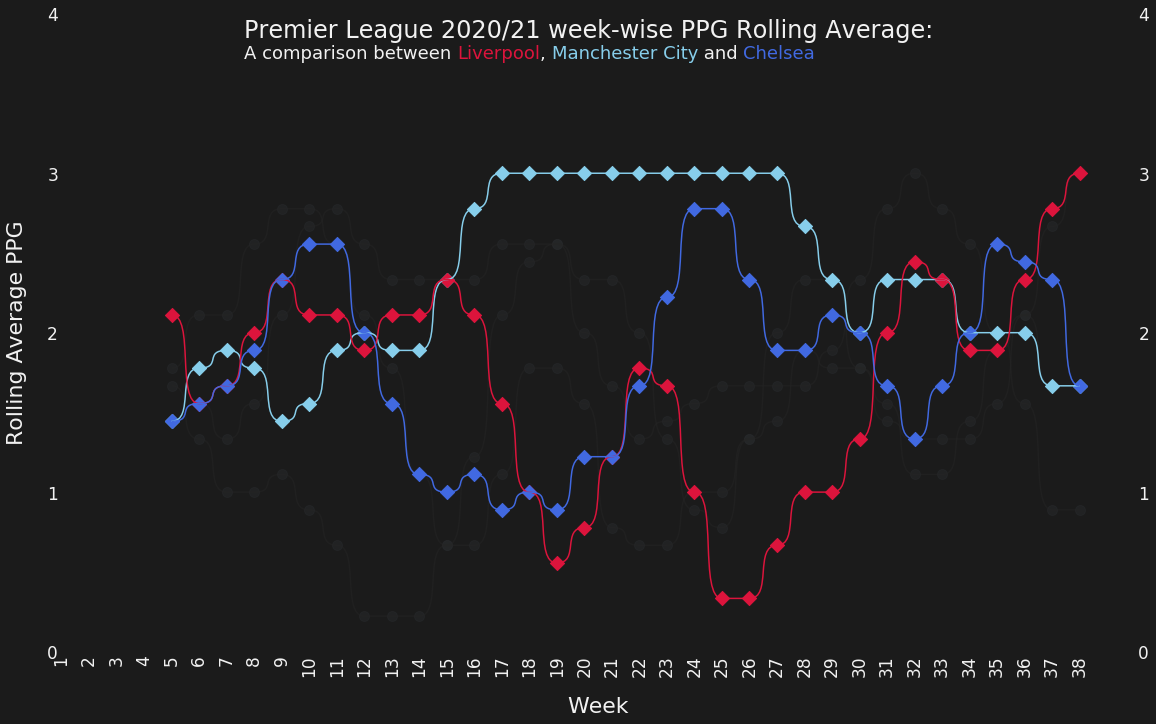

In [228]:
# match-week
match_day = [str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    "Liverpool": "crimson",
    "Man City": "skyblue",
    "Chelsea": "royalblue"
}

# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=22,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.5,  # y label alignment
    alignment_xvalue=0.5  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(0, 4, 5).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(16, 10),  # size of the figure
    x_label='Week', y_label='Rolling Average PPG',  # label name
    ylim=(1, 5),  # y-axis limit
    lw=1.5,   # linewidth of the connecting lines
    upside_down=True,
    # fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Premier League 2020/21 week-wise PPG Rolling Average:"
SUB_TITLE = "A comparison between <Liverpool>, <Manchester City> and <Chelsea>"

# add title
fig.text(0.21, 0.95, TITLE, size=24, color="#F2F2F2")

# add subtitle
fig_text(
    0.21, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'skyblue'}, {"color": 'royalblue'}],
    size=18, fig=fig
)

# add image
# fig = add_image(
#      epl,
#      fig,  # figure
#      0.02, 0.9,  # left and bottom dimensions
#      0.08, 0.08  # height and width values
# )

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

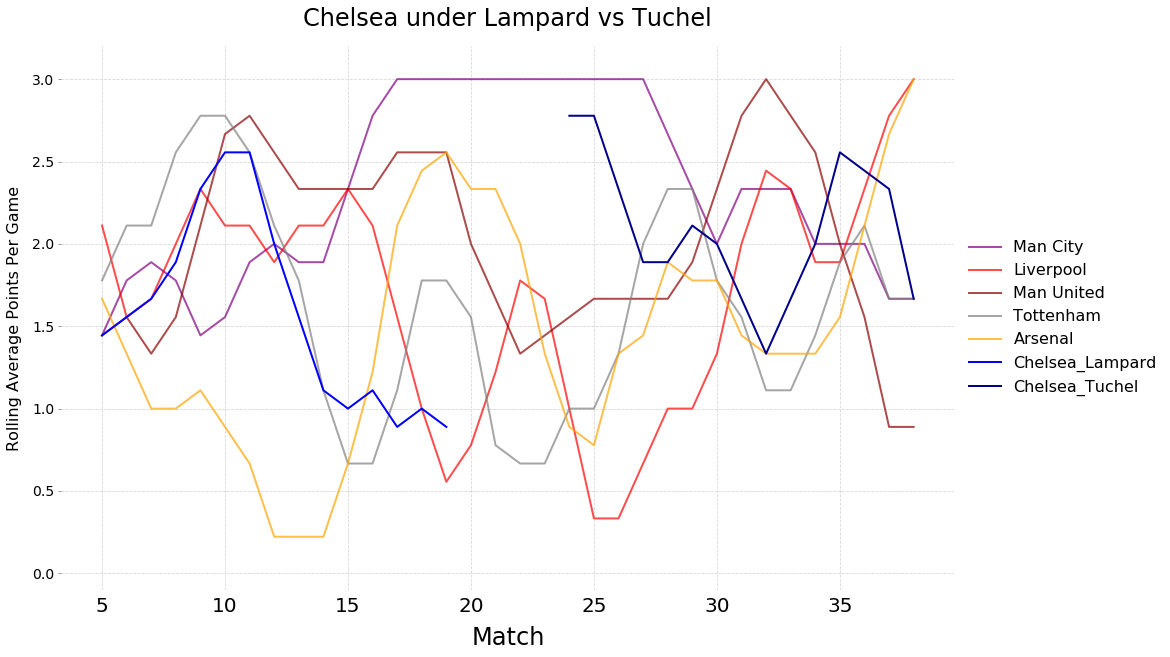

In [100]:
#create plot
fig, ax = plt.subplots(figsize=(16, 10))
colors = ['purple', 'red', 'darkred', 'grey', 'orange', 'blue', 'darkblue']
alphas = [0.7, 0.7, 0.7, 0.7, 0.7, 1, 1]
for club, color, alpha in zip(teams, colors, alphas):
    ax.plot(team_dfs[club]['Game'],  team_dfs[club]['PointsRA'], linewidth=2, linestyle='-',color=color, alpha = alpha, zorder = 2, label = club)

#set title
ax.set_title("Chelsea under Lampard vs Tuchel", fontsize = 24, pad=20)
#make visible ticks for beginning of each season
# ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']) + 38, 38))
#no text
# ax.set_xticklabels([])
#make ticks in the middle
# ax.set_xticks(np.arange(0, max(team_dfs["Liverpool"]['Game']), 38) + 19, minor=True)
#put season text in the middle of season
# ax.set_xticklabels(seasonst, minor=True)
#set axis limits
# ax.set_xlim(0, max(team_dfs["Liverpool"]['Game']) + 10)

ax.set_ylim(-0.1,3.2)
#disable black ticks, but big text xaxis
ax.tick_params(axis='x', color='white', which='both', labelsize = 20)
#grey y ticks
ax.tick_params(axis='y', color='grey', labelsize = 14)
#add grid
ax.grid(zorder = 1, linestyle = "--", alpha = 0.5)
#disable spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#add axis labels
ax.set_ylabel('Rolling Average Points Per Game', fontsize = 16,labelpad=10)
ax.set_xlabel('Match', fontsize = 24, labelpad=10)
#make legend
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left",fontsize=16, edgecolor='white')
plt.show()